In [1]:
# root directory
root_path = f"../../../../"

In [2]:
import pandas as pd

In [3]:
# Load data
df_mx_solvent_data_labeled = pd.read_pickle(f"{root_path}/data/updated/dataset_extended_hsp.pkl")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(12163, 67)


,mx,inchikey_additive,inchikey_solvent,label,gap_oh,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,...,heavy_atom_count_additive,isotope_atom_count_additive,atom_stereo_count_additive,bond_stereo_count_additive,covalent_unit_count_additive,solvent,additive,method_hf,method_licl/hf,method_lif/hcl
0,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,HEDRZPFGACZZDS-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,chloroform,dodecylphosphonic acid,False,False,True
1,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,ZSIAUFGUXNUGDI-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,hexan-1-ol,dodecylphosphonic acid,False,False,True
2,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WYURNTSHIVDZCO-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,oxolane,dodecylphosphonic acid,False,False,True
3,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,CSCPPACGZOOCGX-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,propan-2-one,dodecylphosphonic acid,False,False,True
4,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,acetonitrile,dodecylphosphonic acid,False,False,True


In [4]:
cols_to_keep = [col for col in df_mx_solvent_data_labeled.columns if not (df_mx_solvent_data_labeled[col].nunique() <= 1)]
df_mx_solvent_data_labeled = df_mx_solvent_data_labeled[cols_to_keep]

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

In [6]:
df_mx_solvent_data_labeled['method_hf'] = df_mx_solvent_data_labeled['method_hf'].astype('category').cat.codes
df_mx_solvent_data_labeled['method_licl/hf'] = df_mx_solvent_data_labeled['method_licl/hf'].astype('category').cat.codes
df_mx_solvent_data_labeled['method_lif/hcl'] = df_mx_solvent_data_labeled['method_lif/hcl'].astype('category').cat.codes

In [7]:
df_mx_solvent_data_labeled.head()

,mx,inchikey_additive,inchikey_solvent,label,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,...,rotatable_bond_count_additive,heavy_atom_count_additive,atom_stereo_count_additive,bond_stereo_count_additive,covalent_unit_count_additive,solvent,additive,method_hf,method_licl/hf,method_lif/hcl
0,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,HEDRZPFGACZZDS-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,chloroform,dodecylphosphonic acid,0,0,1
1,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,ZSIAUFGUXNUGDI-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,hexan-1-ol,dodecylphosphonic acid,0,0,1
2,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WYURNTSHIVDZCO-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,oxolane,dodecylphosphonic acid,0,0,1
3,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,CSCPPACGZOOCGX-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,propan-2-one,dodecylphosphonic acid,0,0,1
4,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,acetonitrile,dodecylphosphonic acid,0,0,1


In [8]:
df_mx_solvent_data_labeled.columns

Index(['mx', 'inchikey_additive', 'inchikey_solvent', 'label',
       'work_function_oh', 'formation_energy_oh', 'ehull_oh', 'alphax_el_oh',
       'alphay_el_oh', 'alphaz_el_oh', 'plasmafrequency_x_oh',
       'plasmafrequency_y_oh', 'has_inversion_symmetry_oh', 'gap_o',
       'work_function_o', 'formation_energy_o', 'ehull_o', 'alphax_el_o',
       'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o',
       'plasmafrequency_y_o', 'has_inversion_symmetry_o', 'work_function_f',
       'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f',
       'alphaz_el_f', 'plasmafrequency_x_f', 'plasmafrequency_y_f',
       'has_inversion_symmetry_f', 'delta_d_solvent', 'delta_p_solvent',
       'delta_h_solvent', 'molar_volume_solvent', 'boiling_point_solvent',
       'molecular_weight_additive', 'xlogp_additive', 'tpsa_additive',
       'complexity_additive', 'h_bond_donor_count_additive',
       'h_bond_acceptor_count_additive', 'rotatable_bond_count_additive',
       'heavy_atom_count

In [9]:
features = ['work_function_oh', 'formation_energy_oh', 'ehull_oh', 'alphax_el_oh',
       'alphay_el_oh', 'alphaz_el_oh', 'plasmafrequency_x_oh',
       'plasmafrequency_y_oh', 'has_inversion_symmetry_oh', 'gap_o',
       'work_function_o', 'formation_energy_o', 'ehull_o', 'alphax_el_o',
       'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o',
       'plasmafrequency_y_o', 'has_inversion_symmetry_o', 'work_function_f',
       'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f',
       'alphaz_el_f', 'plasmafrequency_x_f', 'plasmafrequency_y_f',
       'has_inversion_symmetry_f', 'delta_d_solvent', 'delta_p_solvent',
       'delta_h_solvent', 'molar_volume_solvent', 'boiling_point_solvent',
       'molecular_weight_additive', 'xlogp_additive', 'tpsa_additive',
       'complexity_additive', 'h_bond_donor_count_additive',
       'h_bond_acceptor_count_additive', 'rotatable_bond_count_additive',
       'heavy_atom_count_additive', 'atom_stereo_count_additive',
       'bond_stereo_count_additive', 'covalent_unit_count_additive', 'method_hf', 'method_licl/hf', 'method_lif/hcl']
X = df_mx_solvent_data_labeled[features]
y = df_mx_solvent_data_labeled['label']

In [10]:
X.head()

,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,plasmafrequency_x_oh,plasmafrequency_y_oh,has_inversion_symmetry_oh,gap_o,...,h_bond_donor_count_additive,h_bond_acceptor_count_additive,rotatable_bond_count_additive,heavy_atom_count_additive,atom_stereo_count_additive,bond_stereo_count_additive,covalent_unit_count_additive,method_hf,method_licl/hf,method_lif/hcl
0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
2,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
3,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
4,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def plot_feature_distributions(data, features, title, plots_per_row=4):
    num_features = len(features)
    num_rows = (num_features + plots_per_row - 1) // plots_per_row
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 4, num_rows * 3))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(data[feature], kde=True, ax=axes[i], bins=30, color='skyblue')
        axes[i].set_title(f"{title}: {feature}")

    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

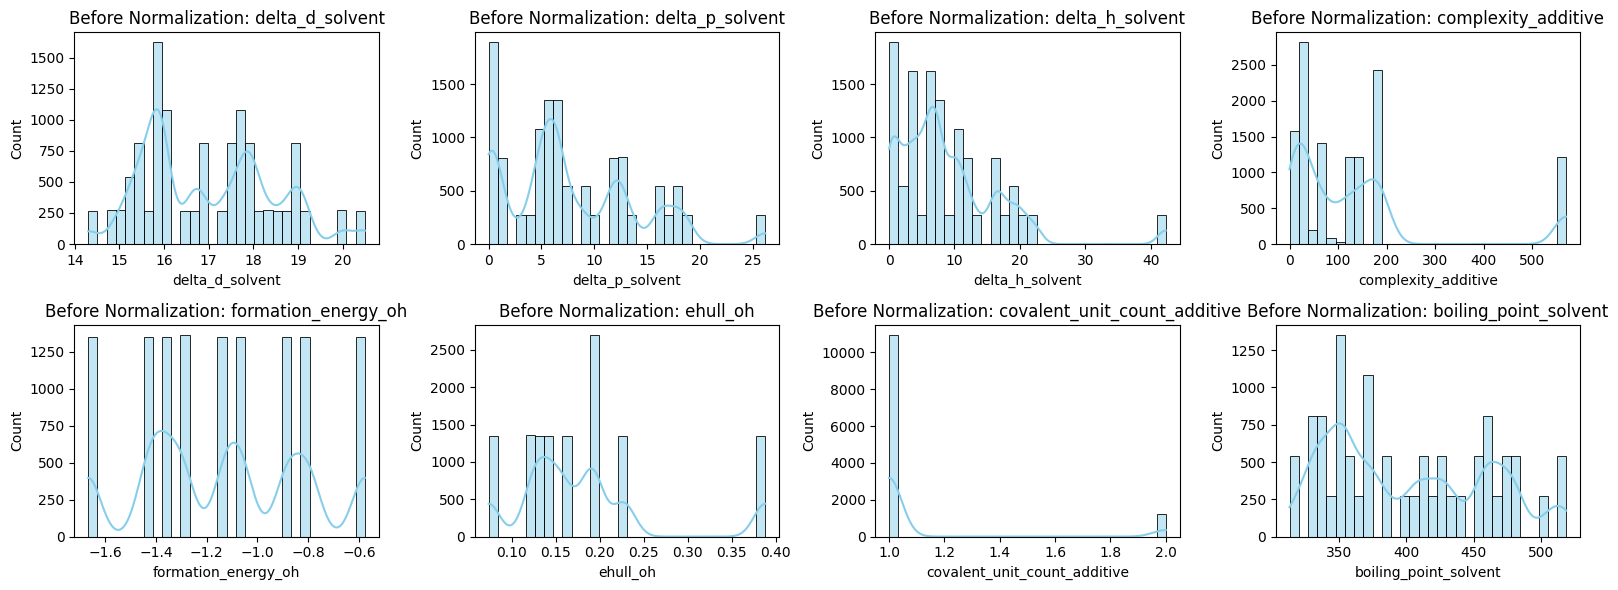

In [14]:
plot_feature = ['delta_d_solvent', 'delta_p_solvent',
       'delta_h_solvent',  'complexity_additive',
   'formation_energy_oh','ehull_oh', 'covalent_unit_count_additive',
   'boiling_point_solvent']
plot_feature_distributions(X, plot_feature, "Before Normalization")

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

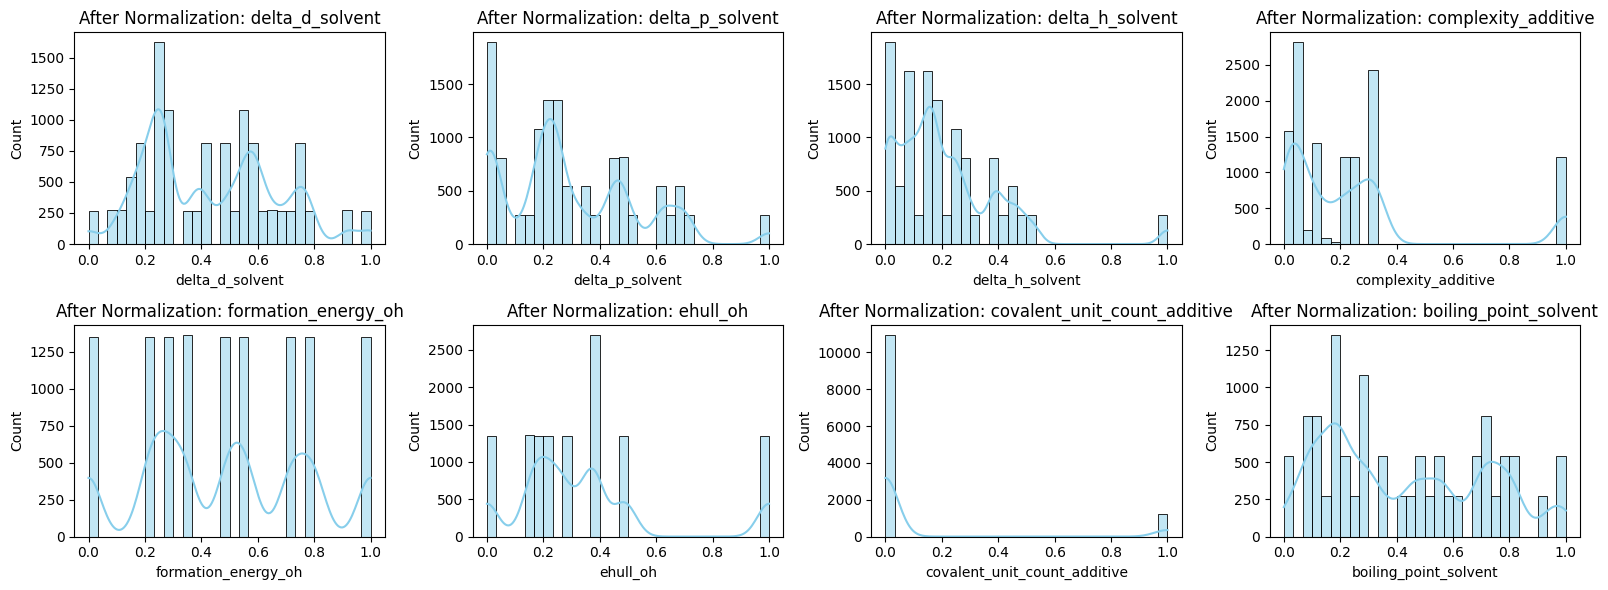

In [17]:
plot_feature_distributions(X_scaled_df, plot_feature, "After Normalization")

In [18]:
mask_pos = y == 1
mask_neg = y == -1
mask_unlabeled = y == 0


In [20]:
from sklearn.impute import KNNImputer

In [21]:
# impute missing data entries using K nearest neighbors
imputer = KNNImputer()
X_impute = imputer.fit_transform(X_scaled)

In [113]:
# PCA for inputs
pca = PCA(n_components=None, random_state=42)
pca.fit(X_impute)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42


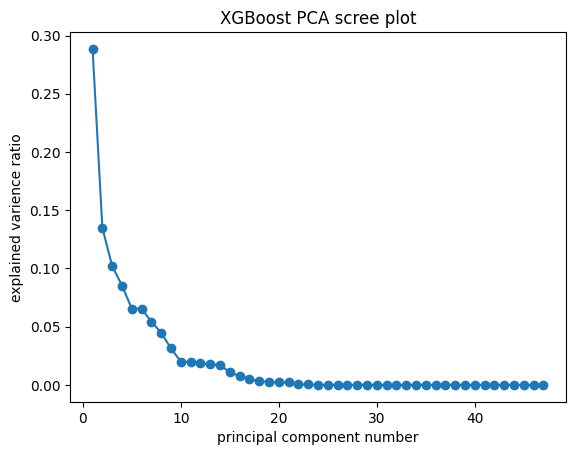

In [114]:
# scree plot
explained_variance = pca.explained_variance_ratio_
component_numbers = np.arange(len(explained_variance)) + 1
plt.plot(component_numbers, explained_variance, marker='o')
plt.xlabel('principal component number')
plt.ylabel('explained varience ratio')
plt.title('XGBoost PCA scree plot')
# plt.xticks(np.arange(0, 50, step=2))
plt.show()

In [94]:
pca = PCA(n_components=22, random_state=42)
X_pca = pca.fit_transform(X_impute)

In [95]:
X_train = X_pca[mask_pos | mask_neg]
y_train = y[mask_pos | mask_neg]

In [96]:
X_test = X_pca[mask_unlabeled]
df_unlabeled = df_mx_solvent_data_labeled[mask_unlabeled].copy()

In [97]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [98]:
print(len(X_train_train))
print(len(X_val))
print(len(y_train_train))
print(len(y_val))

115
29
115
29


In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform

In [100]:
param_dist = {
    'estimator__max_depth': randint(3, 10),
    'estimator__learning_rate': uniform(0.01, 0.3),
    'estimator__n_estimators': randint(50, 200),
    'estimator__subsample': uniform(0.6, 0.4),
    'estimator__colsample_bytree': uniform(0.6, 0.4)
}

In [101]:
base_rf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)
bagging_clf = BaggingClassifier(estimator=base_rf, n_estimators=10, random_state=42)

In [102]:
rand_search = RandomizedSearchCV(
    estimator=bagging_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1
)
rand_search.fit(X_train_train, y_train_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END estimator__colsample_bytree=0.749816047538945, estimator__learning_rate=0.2952142919229748, estimator__max_depth=5, estimator__n_estimators=121, estimator__subsample=0.8394633936788146; total time=   0.2s
[CV] END estimator__colsample_bytree=0.749816047538945, estimator__learning_rate=0.2952142919229748, estimator__max_depth=5, estimator__n_estimators=121, estimator__subsample=0.8394633936788146; total time=   0.1s
[CV] END estimator__colsample_bytree=0.749816047538945, estimator__learning_rate=0.2952142919229748, estimator__max_depth=5, estimator__n_estimators=121, estimator__subsample=0.8394633936788146; total time=   0.2s
[CV] END estimator__colsample_bytree=0.749816047538945, estimator__learning_rate=0.2952142919229748, estimator__max_depth=5, estimator__n_estimators=121, estimator__subsample=0.8394633936788146; total time=   0.1s
[CV] END estimator__colsample_bytree=0.749816047538945, estimator__learning_rate=0

,estimator,BaggingClassi...ndom_state=42)
,param_distributions,"{'estimator__colsample_bytree': <scipy.stats....001530A2AD020>, 'estimator__learning_rate': <scipy.stats....001530A164C50>, 'estimator__max_depth': <scipy.stats....001530A193D40>, 'estimator__n_estimators': <scipy.stats....001530A16C050>, ...}"
,n_iter,30
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [103]:
best_model = rand_search.best_estimator_
print(best_model)

BaggingClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=np.float64(0.8550229885420852),
                                          device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='logloss',
                                          feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate

In [104]:
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Val Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Report:\n", classification_report(y_val, y_val_pred))

Train Accuracy: 0.9583333333333334
Val Accuracy: 0.896551724137931
Validation Report:
               precision    recall  f1-score   support

          -1       0.80      0.89      0.84         9
           1       0.95      0.90      0.92        20

    accuracy                           0.90        29
   macro avg       0.87      0.89      0.88        29
weighted avg       0.90      0.90      0.90        29



In [105]:
proba_unlabeled = best_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive)
df_unlabeled['predicted_proba'] = proba_unlabeled
df_unlabeled['predicted_label'] = (proba_unlabeled >= 0.5).astype(int)

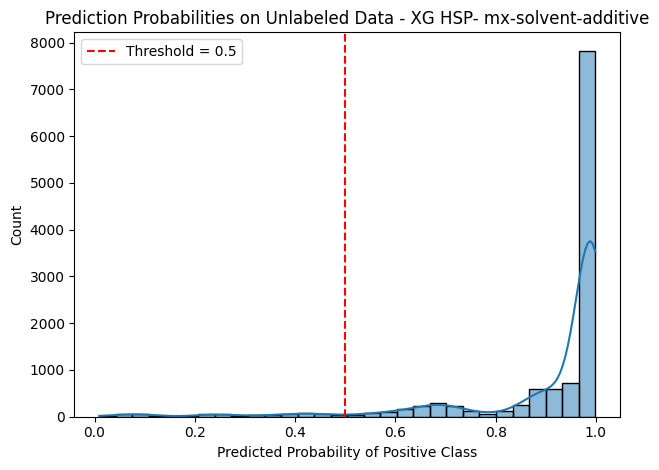

In [106]:
sns.histplot(proba_unlabeled, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Prediction Probabilities on Unlabeled Data - XG HSP- mx-solvent-additive")
plt.xlabel("Predicted Probability of Positive Class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [107]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
high_conf = high_conf[high_conf['predicted_proba'] < 0.99]
same_solvent_additive = high_conf[high_conf['solvent'] == high_conf['additive']]
top_same = same_solvent_additive.sort_values(by='predicted_proba', ascending=False).head(20)
print("solvent the same as additive")
print(top_same[['mx', 'solvent', 'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])


solvent the same as additive
         mx                      solvent  predicted_proba  method_lif/hcl  \
287   Ti2C1                    formamide         0.989695               0   
1268  Ta4C3            N-methylformamide         0.989547               0   
631   Mo2C1     1-methylpyrrolidin-2-one         0.989482               1   
519    V2C1                   decan-1-ol         0.989454               1   
1224  Ta4C3                    formamide         0.989419               0   
852   Ti4N3  4-methyl-1,3-dioxolan-2-one         0.989246               0   
687   Mo2C1                    formamide         0.989245               0   
455   Nb2C1        N,N-dimethylformamide         0.989110               0   
1168  Ta4C3     1-methylpyrrolidin-2-one         0.989098               1   
721   Mo2C1        methylsulfinylmethane         0.989094               0   
467   Nb2C1        N,N-dimethylacetamide         0.989078               0   
231   Ti2C1     1-methylpyrrolidin-2-one       

In [108]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
high_conf = high_conf[high_conf['predicted_proba'] < 0.99]
same_solvent_additive = high_conf[high_conf['solvent'] != high_conf['additive']]
top_same = same_solvent_additive.sort_values(by='predicted_proba', ascending=False).head(20)
print("solvent different than additive")
print(top_same[['mx', 'solvent', 'additive',  'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

solvent different than additive
          mx                     solvent                           additive  \
9725   Zr3C2                     styrene              phenylphosphonic acid   
7808   Ti4N3                     ethanol             dodecylphosphonic acid   
9541   Zr3C2         1,2-dichlorobenzene                propane-1,2,3-triol   
7870   Ti4N3                 cyclohexane             dodecylphosphonic acid   
4531   Nb2C1               ethyl acetate                propane-1,2,3-triol   
5424    V2C1                     oxidane             dodecylphosphonic acid   
11393  Ta4C3                acetonitrile           (Z)-octadec-9-en-1-amine   
11206  Ta4C3          1,1-dichloroethane                propane-1,2,3-triol   
3837   Nb2C1                     toluene           (Z)-octadec-9-en-1-amine   
11017  Ta4C3             dichloromethane                propane-1,2,3-triol   
5537    V2C1          1,1-dichloroethane  5-(2-methoxyethoxy)pentanoic acid   
8936   Zr3C2        

In [109]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.3]
same_solvent_additive = low_conf[low_conf['solvent'] == low_conf['additive']]
bott_same = same_solvent_additive.sort_values(by='predicted_proba', ascending=True).head(20)
print("solvent the same as additive")
print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.3):")
print(bott_same[['mx', 'solvent', 'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

solvent the same as additive
MXene-solvent pairs predicted to NOT work at all (P ≤ 0.3):
        mx                solvent  predicted_proba  method_lif/hcl  \
154  Ti3C2        dichloromethane         0.009340               0   
165  Ti3C2     1,1-dichloroethane         0.011722               0   
188  Ti3C2        dichloromethane         0.011867               0   
157  Ti3C2            cyclohexane         0.012823               0   
149  Ti3C2             chloroform         0.012967               0   
167  Ti3C2     tetrachloromethane         0.013320               0   
151  Ti3C2                oxolane         0.013358               0   
203  Ti3C2     tetrachloromethane         0.013560               0   
201  Ti3C2     1,1-dichloroethane         0.014219               0   
202  Ti3C2  N,N-diethylethanamine         0.018780               0   
166  Ti3C2  N,N-diethylethanamine         0.019081               0   
204  Ti3C2                heptane         0.019771               0   
1

In [110]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.3]
same_solvent_additive = low_conf[low_conf['solvent'] != low_conf['additive']]
bott_same = same_solvent_additive.sort_values(by='predicted_proba', ascending=True).head(20)
print("solvent different than additive")
print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.3):")
print(bott_same[['mx', 'solvent', 'additive',  'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

solvent different than additive
MXene-solvent pairs predicted to NOT work at all (P ≤ 0.3):
         mx                      solvent                        additive  \
1597  Ti3C2                 oxolan-2-one  benzyl(methyl)azanium;chloride   
1364  Ti3C2  4-methyl-1,3-dioxolan-2-one  benzyl(methyl)azanium;chloride   
1392  Ti3C2        methylsulfinylmethane  benzyl(methyl)azanium;chloride   
1489  Ti3C2                    formamide  benzyl(methyl)azanium;chloride   
1291  Ti3C2                   chloroform  benzyl(methyl)azanium;chloride   
1642  Ti3C2                  pentan-1-ol  benzyl(methyl)azanium;chloride   
1378  Ti3C2                     methanol  benzyl(methyl)azanium;chloride   
1298  Ti3C2                   hexan-1-ol  benzyl(methyl)azanium;chloride   
1312  Ti3C2                 propan-2-one  benzyl(methyl)azanium;chloride   
1325  Ti3C2                  propan-2-ol  benzyl(methyl)azanium;chloride   
1349  Ti3C2               methyl acetate  benzyl(methyl)azanium;chloride

In [111]:
print("\n=== Summary of predicted probabilities on unlabeled data ===")
print(df_unlabeled['predicted_proba'].describe())

# Count how many samples fall into different confidence zones
bins = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['Very Low (≤0.1)', 'Low (0.1–0.3)', 'Mid (0.3–0.5)',
          'High (0.5–0.7)', 'Very High (0.7–0.9)', 'Extremely High (>0.9)']

df_unlabeled['confidence_bin'] = pd.cut(df_unlabeled['predicted_proba'], bins=bins, labels=labels, include_lowest=True)
print("\n=== Prediction count by confidence bin ===")
print(df_unlabeled['confidence_bin'].value_counts().sort_index())


=== Summary of predicted probabilities on unlabeled data ===
count    12019.000000
mean         0.902972
std          0.180727
min          0.009340
25%          0.907227
50%          0.985542
75%          0.993776
max          0.998589
Name: predicted_proba, dtype: float64

=== Prediction count by confidence bin ===
confidence_bin
Very Low (≤0.1)           132
Low (0.1–0.3)             177
Mid (0.3–0.5)             295
High (0.5–0.7)            885
Very High (0.7–0.9)      1393
Extremely High (>0.9)    9137
Name: count, dtype: int64


In [112]:
df_unlabeled.to_csv(f"004_p_vs_n_predictions_unlabeled_xg-normalize-fintune-pca-mxsolvadd.csv")
df_unlabeled.to_pickle(f"004_p_vs_n_predictions_unlabeled_xg-normalize-fintune-pca-mxsolvadd.pkl")
